# Ch 2. 監督式學習：迴歸
## 2-4. 處理非線性關係
2-4-1. 變數轉換  
[2-4-2. 多項式迴歸](#sec2_4_2)  
[2-4-3. 隨機森林迴歸](#sec2_4_3) 
***

<a id='sec2_4_2'></a>
## 2-4-2. 多項式迴歸

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')

house = load_boston()
df = pd.DataFrame(data=house.data, 
                  columns=house.feature_names)
df['MEDV'] = house.target

x, y = df[['LSTAT']].values, df['MEDV'].values
x[:3, :]

array([[4.98],
       [9.14],
       [4.03]])

### 三個多項式迴歸模型

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

def adj_r2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

r2_lst, mse_lst, y_plot_lst = [None], [None], [None]
# 產生繪圖的 x 座標
x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)

def reg_r2_mse(x, y, deg):
    # 產生 deg 次多項式特徵
    pol_d = PolynomialFeatures(degree=deg)
    x = pol_d.fit_transform(x)
    
    lr = LinearRegression()
    lr = lr.fit(x, y)
    y_pred = lr.predict(x)
    r2_lst.append(adj_r2(r2_score(y, y_pred), x.shape[0], 1))
    y_plot_lst.append(lr.predict(pol_d.fit_transform(x_plot)))

reg_r2_mse(x, y, 1)
reg_r2_mse(x, y, 2)
reg_r2_mse(x, y, 3)
r2_lst  # 三個迴歸模型的 Adj. R

[None, 0.5432418259547068, 0.6400040338643826, 0.657168766860583]

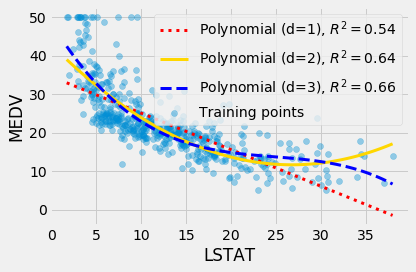

In [3]:
plt.scatter(x, y, label='Training points', alpha=.4)

plt.plot(x_plot, y_plot_lst[1], 
         color='red', lw=3, linestyle=':', 
         label='Polynomial (d=1), $R^2=%.2f$' % r2_lst[1])

plt.plot(x_plot, y_plot_lst[2],
         color='gold', lw=3, linestyle='-',
         label='Polynomial (d=2), $R^2=%.2f$' % r2_lst[2])

plt.plot(x_plot, y_plot_lst[3],
         color='blue', lw=3, linestyle='--',
         label='Polynomial (d=3), $R^2=%.2f$' % r2_lst[3])

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.tight_layout()

### 殘差圖

R^2(train): 0.7799761809404298
R^2(test): 0.6529851164348724


Text(0, 0.5, 'Residual')

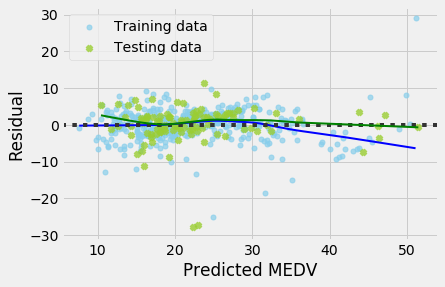

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split

X = df.loc[:, ['RM', 'LSTAT']].values
y = df['MEDV'].values

pol_d = PolynomialFeatures(degree=2)
X_poly = pol_d.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
r2 = adj_r2(r2_score(y_train, y_train_pred), X.shape[0], X.shape[1])
print('R^2(train):', r2)
r2 = adj_r2(r2_score(y_test, y_test_pred), X.shape[0], X.shape[1])
print('R^2(test):', r2)

y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test 

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
              color="skyblue", label='Training data', 
              scatter_kws={'s': 25, 'alpha':0.7}, 
              line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
              color="yellowgreen", label='Testing data', 
              scatter_kws={'s': 25, 'marker':'x'}, 
              line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted MEDV')
plt.ylabel('Residual')

<a id='sec2_4_3'></a>
## 2-4-3. 隨機森林迴歸

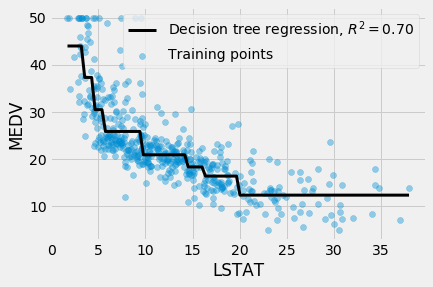

In [5]:
from sklearn.tree import DecisionTreeRegressor

x, y = df[['LSTAT']].values, df['MEDV'].values
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x, y)
y_pred = reg.predict(x)
r2 = adj_r2(r2_score(y, y_pred), x.shape[0], 1)

x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_plot = reg.predict(x_plot)
plt.scatter(x, y, label='Training points', alpha=.4)
plt.plot(x_plot, y_plot, 
         color='black', lw=3, linestyle='-', 
         label='Decision tree regression, $R^2=%.2f$' % r2)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

R^2(train): 0.9827493820476455
R^2(test): 0.9745681993842027


Text(0, 0.5, 'Residual')

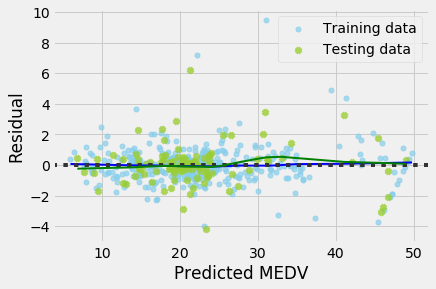

In [6]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

reg = RandomForestRegressor(n_estimators=100,# default 
                            criterion='mse', # default
                            random_state=0, 
                            n_jobs=-1)
reg.fit(X, y)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
r2 = adj_r2(r2_score(y_train, y_train_pred), X.shape[0], X.shape[1])
print('R^2(train):', r2)
r2 = adj_r2(r2_score(y_test, y_test_pred), X.shape[0], X.shape[1])
print('R^2(test):', r2)

y_train_resid = y_train_pred - y_train
y_test_resid = y_test_pred - y_test 

sns.residplot(y_train_pred, y_train_resid, lowess=True, 
              color="skyblue", label='Training data', 
              scatter_kws={'s': 25, 'alpha':0.7}, 
              line_kws={'color': 'b', 'lw':2})
sns.residplot(y_test_pred, y_test_resid, lowess=True, 
              color="yellowgreen", label='Testing data', 
              scatter_kws={'s': 25, 'marker':'x'}, 
              line_kws={'color': 'g', 'lw':2})
plt.legend()
plt.xlabel('Predicted MEDV')
plt.ylabel('Residual')